In [1]:
import pandas as pd
import numpy as np
basic = pd.read_excel('2021-2022basic.xlsx',index_col=0)
basic.info()
player_name = basic['Player']
player_name

<class 'pandas.core.frame.DataFrame'>
Int64Index: 812 entries, 1 to 605
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  812 non-null    object 
 1   Pos     812 non-null    object 
 2   Age     812 non-null    int64  
 3   Tm      812 non-null    object 
 4   G       812 non-null    int64  
 5   GS      812 non-null    int64  
 6   MP      812 non-null    float64
 7   FG      812 non-null    float64
 8   FGA     812 non-null    float64
 9   FG%     797 non-null    float64
 10  3P      812 non-null    float64
 11  3PA     812 non-null    float64
 12  3P%     740 non-null    float64
 13  2P      812 non-null    float64
 14  2PA     812 non-null    float64
 15  2P%     784 non-null    float64
 16  eFG%    797 non-null    float64
 17  FT      812 non-null    float64
 18  FTA     812 non-null    float64
 19  FT%     715 non-null    float64
 20  ORB     812 non-null    float64
 21  DRB     812 non-null    float64
 22  TR

Rk
1       Precious Achiuwa
2           Steven Adams
3            Bam Adebayo
4           Santi Aldama
5      LaMarcus Aldridge
             ...        
601       Thaddeus Young
602           Trae Young
603       Omer Yurtseven
604          Cody Zeller
605          Ivica Zubac
Name: Player, Length: 812, dtype: object

In [23]:
basic

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
Rk,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,Precious Achiuwa,C,22,TOR,73,28,23.6,3.6,8.3,0.439,0.8,2.1,0.359,2.9,6.1,0.468,0.486,1.1,1.8,0.595,2.0,4.5,6.5,1.1,0.5,0.6,1.2,2.1,9.1
2,Steven Adams,C,28,MEM,76,75,26.3,2.8,5.1,0.547,0.0,0.0,0.000,2.8,5.0,0.548,0.547,1.4,2.6,0.543,4.6,5.4,10.0,3.4,0.9,0.8,1.5,2.0,6.9
3,Bam Adebayo,C,24,MIA,56,56,32.6,7.3,13.0,0.557,0.0,0.1,0.000,7.3,12.9,0.562,0.557,4.6,6.1,0.753,2.4,7.6,10.1,3.4,1.4,0.8,2.6,3.1,19.1
4,Santi Aldama,PF,21,MEM,32,0,11.3,1.7,4.1,0.402,0.2,1.5,0.125,1.5,2.6,0.560,0.424,0.6,1.0,0.625,1.0,1.7,2.7,0.7,0.2,0.3,0.5,1.1,4.1
5,LaMarcus Aldridge,C,36,BRK,47,12,22.3,5.4,9.7,0.550,0.3,1.0,0.304,5.1,8.8,0.578,0.566,1.9,2.2,0.873,1.6,3.9,5.5,0.9,0.3,1.0,0.9,1.7,12.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
601,Thaddeus Young,PF,33,TOR,26,0,18.3,2.6,5.5,0.465,0.7,1.7,0.395,1.9,3.9,0.495,0.524,0.5,1.0,0.481,1.5,2.9,4.4,1.7,1.2,0.4,0.8,1.7,6.3
602,Trae Young,PG,23,ATL,76,76,34.9,9.4,20.3,0.460,3.1,8.0,0.382,6.3,12.3,0.512,0.536,6.6,7.3,0.904,0.7,3.1,3.7,9.7,0.9,0.1,4.0,1.7,28.4
603,Omer Yurtseven,C,23,MIA,56,12,12.6,2.3,4.4,0.526,0.0,0.2,0.091,2.3,4.2,0.547,0.528,0.7,1.1,0.623,1.5,3.7,5.3,0.9,0.3,0.4,0.7,1.5,5.3


,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
Rk,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12,Giannis Antetokounmpo,PF,27,MIL,67,67,32.9,10.3,18.6,0.553,1.1,3.6,0.293,9.2,15.0,0.616,0.582,8.3,11.4,0.722,2.0,9.6,11.6,5.8,1.1,1.4,3.3,3.2,29.9
87,Jimmy Butler,SF,32,MIA,57,57,33.9,7.0,14.5,0.480,0.5,2.0,0.233,6.5,12.5,0.520,0.496,6.9,8.0,0.870,1.8,4.1,5.9,5.5,1.6,0.5,2.1,1.5,21.4
134,DeMar DeRozan,PF,32,CHI,76,76,36.1,10.2,20.2,0.504,0.7,1.9,0.352,9.5,18.3,0.520,0.521,6.8,7.8,0.877,0.7,4.4,5.2,4.9,0.9,0.3,2.4,2.3,27.9
141,Luka Dončić,PG,22,DAL,65,65,35.4,9.9,21.6,0.457,3.1,8.8,0.353,6.8,12.8,0.528,0.529,5.6,7.5,0.744,0.9,8.3,9.1,8.7,1.2,0.6,4.5,2.2,28.4
154,Kevin Durant,PF,33,BRK,55,55,37.2,10.5,20.3,0.518,2.1,5.5,0.383,8.4,14.8,0.568,0.570,6.8,7.4,0.910,0.5,6.9,7.4,6.4,0.9,0.9,3.5,2.1,29.9
162,Joel Embiid,C,27,PHI,68,68,33.8,9.8,19.6,0.499,1.4,3.7,0.371,8.4,15.9,0.529,0.534,9.6,11.8,0.814,2.1,9.6,11.7,4.2,1.1,1.5,3.1,2.7,30.6
192,Shai Gilgeous-Alexander,PG,23,OKC,56,56,34.7,8.5,18.8,0.453,1.6,5.3,0.300,6.9,13.5,0.514,0.496,5.9,7.2,0.810,0.7,4.3,5.0,5.9,1.3,0.8,2.8,2.5,24.5
218,James Harden,PG,32,TOT,65,65,37.2,6.3,15.3,0.410,2.3,6.9,0.330,4.0,8.4,0.476,0.485,7.2,8.2,0.877,0.8,6.8,7.7,10.3,1.3,0.6,4.4,2.4,22.0
218,James Harden,PG,32,BRK,44,44,37.0,6.6,16.0,0.414,2.3,7.0,0.332,4.3,9.1,0.476,0.486,6.9,8.0,0.869,1.0,7.0,8.0,10.2,1.3,0.7,4.8,2.4,22.5


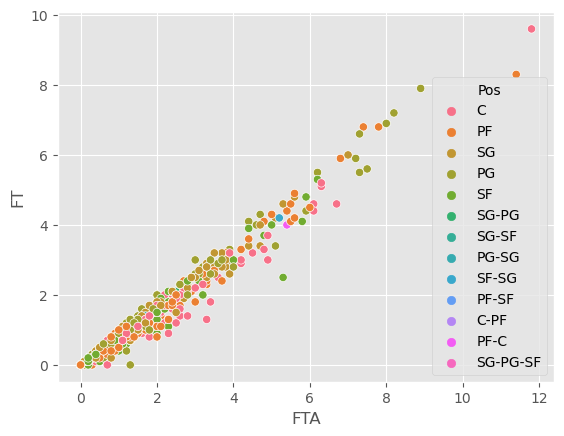

In [25]:
import seaborn as sns
sns.scatterplot(x = 'FTA', y = 'FT', data = basic, hue = 'Pos')
basic[(basic['FTA']>7)]

In [2]:
pd.set_option('display.max_columns',None)
basic[basic['FG%'].isnull()==True]

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
Rk,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
43,Jordan Bell,C,27,CHI,1,0,2.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,1.0,0.0,1.0,0.0,1.0,0.0,0.0,2.0,0.0
98,Willie Cauley-Stein,C,28,PHI,2,0,3.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,1.0,1.0,0.5,0.0,0.0,0.0,1.0,0.0
132,Sam Dekker,PF,27,TOR,1,0,1.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
133,Javin DeLaurier,C,23,MIL,1,0,3.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
155,Jaime Echenique,C,24,WAS,1,0,3.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
180,Wenyen Gabriel,PF,24,BRK,1,0,1.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
215,Tyler Hall,SG,24,NYK,1,0,2.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
275,DeJon Jarreau,SG,24,IND,1,0,1.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
331,Scottie Lewis,SG,21,CHO,2,0,3.5,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,0.5,1.0,0.50,0.0,0.0,0.0,0.5,0.5,0.0,0.0,0.0,0.5


In [3]:
strange_name = []
for i in player_name:
    if '?' in i:
        strange_name.append(i)
strange_name

[]

In [4]:
advanced = pd.read_excel('2021-2022advanced.xlsx',index_col=0)
advanced

,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
Rk,,,,,,,,,,,,,,,,,,,,,,,,,,
1,Precious Achiuwa,C,22,TOR,73,1725,12.7,0.503,0.259,0.217,8.7,21.7,14.9,6.9,1.1,2.3,11.3,18.5,0.4,2.1,2.5,0.070,-2.0,-0.6,-2.6,-0.2
2,Steven Adams,C,28,MEM,76,1999,17.6,0.560,0.003,0.518,17.9,22.0,19.9,16.1,1.6,2.7,19.6,12.0,3.8,3.0,6.8,0.163,1.0,1.0,2.0,2.0
3,Bam Adebayo,C,24,MIA,56,1825,21.8,0.608,0.008,0.466,8.7,26.1,17.5,17.5,2.2,2.6,14.4,25.0,3.6,3.5,7.2,0.188,1.7,2.1,3.8,2.7
4,Santi Aldama,PF,21,MEM,32,360,10.2,0.452,0.364,0.242,9.4,16.1,12.6,7.7,0.8,2.5,9.9,18.4,-0.1,0.4,0.3,0.044,-4.2,-1.5,-5.7,-0.3
5,LaMarcus Aldridge,C,36,BRK,47,1050,19.6,0.604,0.100,0.223,7.8,18.7,13.4,6.3,0.6,4.0,8.0,22.4,2.1,1.0,3.1,0.141,1.3,-0.6,0.7,0.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
601,Thaddeus Young,PF,33,TOR,26,475,15.8,0.526,0.299,0.188,8.7,18.1,13.1,13.6,3.3,2.3,12.4,16.0,0.5,0.8,1.3,0.127,-0.2,2.2,2.0,0.5
602,Trae Young,PG,23,ATL,76,2652,25.4,0.603,0.395,0.358,2.1,9.6,5.9,46.7,1.3,0.2,14.5,34.4,9.0,1.0,10.0,0.181,7.1,-2.0,5.2,4.8
603,Omer Yurtseven,C,23,MIA,56,706,17.4,0.546,0.045,0.247,13.9,33.0,23.6,11.0,1.2,3.0,13.0,19.9,0.8,1.4,2.1,0.145,-1.4,0.4,-1.0,0.2


In [91]:
advanced.info()
advanced[advanced['TS%'].isnull() == True] 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 812 entries, 1 to 605
Data columns (total 26 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  812 non-null    object 
 1   Pos     812 non-null    object 
 2   Age     812 non-null    int64  
 3   Tm      812 non-null    object 
 4   G       812 non-null    int64  
 5   MP      812 non-null    int64  
 6   PER     812 non-null    float64
 7   TS%     799 non-null    float64
 8   3PAr    797 non-null    float64
 9   FTr     797 non-null    float64
 10  ORB%    812 non-null    float64
 11  DRB%    812 non-null    float64
 12  TRB%    812 non-null    float64
 13  AST%    812 non-null    float64
 14  STL%    812 non-null    float64
 15  BLK%    812 non-null    float64
 16  TOV%    799 non-null    float64
 17  USG%    812 non-null    float64
 18  OWS     812 non-null    float64
 19  DWS     812 non-null    float64
 20  WS      812 non-null    float64
 21  WS/48   812 non-null    float64
 22  OB

,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
Rk,,,,,,,,,,,,,,,,,,,,,,,,,,
43,Jordan Bell,C,27,CHI,1,2,29.9,NaN,NaN,NaN,56.6,0.0,28.1,0.0,24.4,0.0,NaN,0.0,0.0,0.0,0.0,0.600,-8.1,10.8,2.7,0.0
98,Willie Cauley-Stein,C,28,PHI,2,6,4.2,NaN,NaN,NaN,0.0,36.6,18.6,20.4,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.136,-4.6,5.8,1.2,0.0
132,Sam Dekker,PF,27,TOR,1,1,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.003,-6.2,-3.4,-9.6,0.0
133,Javin DeLaurier,C,23,MIL,1,3,15.6,NaN,NaN,NaN,0.0,34.6,17.7,0.0,16.0,0.0,NaN,0.0,0.0,0.0,0.0,0.260,-4.8,11.8,7.0,0.0
155,Jaime Echenique,C,24,WAS,1,3,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,-0.012,-5.5,-3.0,-8.5,0.0
180,Wenyen Gabriel,PF,24,BRK,1,1,11.8,NaN,NaN,NaN,0.0,100.0,54.5,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.167,-1.9,0.3,-1.6,0.0
215,Tyler Hall,SG,24,NYK,1,2,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.007,-8.1,-0.5,-8.5,0.0
275,DeJon Jarreau,SG,24,IND,1,1,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,-0.022,-6.5,-1.5,-8.0,0.0
378,C.J. Miles,SG,34,BOS,1,2,-7.8,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.030,-16.3,0.0,-16.3,0.0


In [5]:
#按照进攻贡献值排序，谁能解释为什么中锋的进攻贡献值这么高，戈贝尔居然和唐斯恩比德并列？
ws = advanced[['Player','Pos','Age','Tm','OWS','DWS','WS']]
ws.sort_values('OWS',ascending = False, inplace = False).head(20)

,Player,Pos,Age,Tm,OWS,DWS,WS
Rk,,,,,,,
290,Nikola Jokić,C,26,DEN,10.8,4.5,15.2
12,Giannis Antetokounmpo,PF,27,MIL,9.2,3.7,12.9
602,Trae Young,PG,23,ATL,9.0,1.0,10.0
162,Joel Embiid,C,27,PHI,7.9,4.1,12.0
195,Rudy Gobert,C,29,UTA,7.3,4.3,11.7
546,Karl-Anthony Towns,C,26,MIN,7.1,3.2,10.3
134,DeMar DeRozan,PF,32,CHI,7.0,1.8,8.8
154,Kevin Durant,PF,33,BRK,6.4,2.0,8.4
87,Jimmy Butler,SF,32,MIA,6.2,2.9,9.2


In [6]:
#按照防守贡献值排序,塔图姆和约基奇居然排在联盟前二？
ws.sort_values('DWS',ascending = False, inplace = False).head(20)

,Player,Pos,Age,Tm,OWS,DWS,WS
Rk,,,,,,,
526,Jayson Tatum,SF,23,BOS,5.0,4.6,9.6
290,Nikola Jokić,C,26,DEN,10.8,4.5,15.2
195,Rudy Gobert,C,29,UTA,7.3,4.3,11.7
162,Joel Embiid,C,27,PHI,7.9,4.1,12.0
589,Robert Williams,C,24,BOS,6.0,3.9,9.9
250,Al Horford,C,35,BOS,3.7,3.8,7.6
141,Luka Dončić,PG,22,DAL,3.8,3.8,7.6
509,Marcus Smart,PG,27,BOS,1.9,3.7,5.6
66,Mikal Bridges,SF,25,PHO,5.2,3.7,8.9


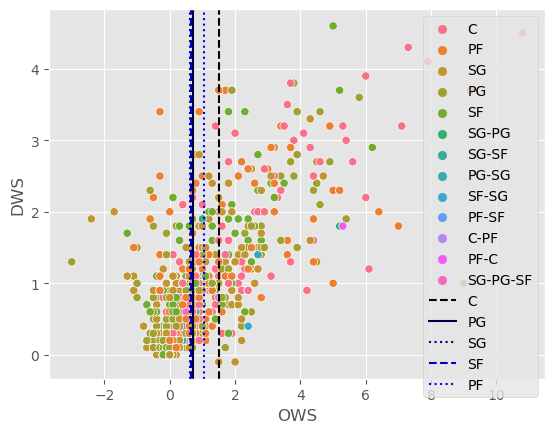

In [93]:
##看一个球员的防守贡献值与进攻贡献值
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(x = 'OWS', y = 'DWS', data = ws, hue = 'Pos')
plt.axvline(x = ws[ws['Pos']=='C']['OWS'].mean(),ls = '--',label = "C",color = [0,0,0])
plt.axvline(x = ws[ws['Pos']=='PG']['OWS'].mean(),ls = 'solid',label = "PG",color = [0,0,0.25])
plt.axvline(x = ws[ws['Pos']=='SG']['OWS'].mean(),ls = 'dotted',label = "SG",color = [0,0,0.5])
plt.axvline(x = ws[ws['Pos']=='SF']['OWS'].mean(),ls = 'dashed',label = "SF",color = [0,0,0.75])
plt.axvline(x = ws[ws['Pos']=='PF']['OWS'].mean(),ls = ':',label = "PF",color = [0,0,1])
plt.legend()

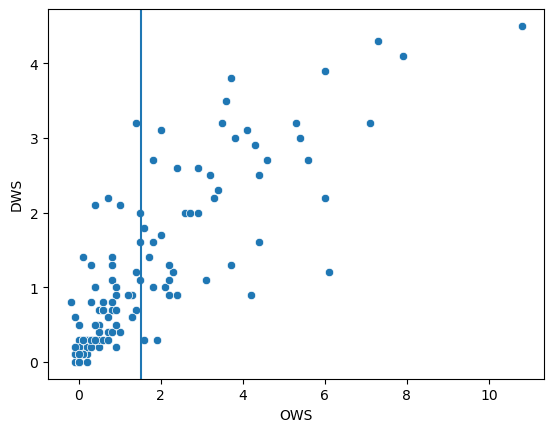

In [8]:
import matplotlib.pyplot as plt
sns.scatterplot(x = 'OWS', y = 'DWS', data = ws[ws['Pos']=='C'])
plt.axvline(x = ws[ws['Pos']=='C']['OWS'].mean(),ls = '-',label = "C")

In [9]:
play_by_play = pd.read_excel("2021-2022play-by-play.xlsx",index_col=0,header = [0,1])
play_by_play

Unnamed: 1_level_0 Unnamed: 2_level_0 Unnamed: 3_level_0  \
Rk              Player                Pos                Age   
1     Precious Achiuwa                  C                 22   
2         Steven Adams                  C                 28   
3          Bam Adebayo                  C                 24   
4         Santi Aldama                 PF                 21   
5    LaMarcus Aldridge                  C                 36   
..                 ...                ...                ...   
601     Thaddeus Young                 PF                 33   
602         Trae Young                 PG                 23   
603     Omer Yurtseven                  C                 23   
604        Cody Zeller                  C                 29   
605        Ivica Zubac                  C                 24   

    Unnamed: 4_level_0 Totals       Position Estimate                          \
Rk                  Tm      G    MP               PG%   SG%   SF%   PF%    C%   
1                  TOR     73  1725               NaN   NaN   NaN  0.02  0.98   
2                  MEM     76  1999               NaN   NaN   NaN   NaN  1.00   
3                  MIA     56  1825               NaN   NaN   NaN  0.02  0.98   
4                  MEM     32   360               NaN   NaN  0.03  0.49  0.49   
5                  BRK     47  1050               NaN   NaN   NaN   NaN  1.00   
..                 ...    ...   ...               ...   ...   ...   ...   ...   
601                TOR     26   475               NaN  0.18  0.59  0.22  0.01   
602                ATL     76  2652               1.0   NaN   NaN   NaN   NaN   
603                MIA     56   706               NaN   NaN   NaN   NaN  1.00   
604                POR     27   355               NaN   NaN   NaN   NaN  1.00   
605                LAC     76  1852               NaN   NaN   NaN   NaN  1.00   

    +/- Per 100 Poss.        Turnovers          Fouls Committed       \
Rk            OnCourt On-Off   BadPass LostBall           Shoot Off.   
1                 2.2    0.0        19       26              70   24   
2                 7.9    4.2        71       15              78   19   
3                 7.6    5.5        59       39              72   38   
4                 2.3   -3.8         7        3              16    5   
5                 1.5    0.1        12       11              46   12   
..                ...    ...       ...      ...             ...  ...   
601               6.0    4.4        14        7              27    1   
602               2.9    3.4       221       54              47    9   
603               4.8    0.3        13       11              52   12   
604              -2.8    6.8         5        3              19    8   
605              -3.5   -6.8        36       39             126   23   

    Fouls Drawn      Misc.            
Rk        Shoot Off.   PGA And1 Blkd  
1            64   10   200   15   51  
2            83   13   569   23   44  
3           173    8   480   48   40  
4            16    1    58    5    5  
5            56    0   110   22   11  
..          ...  ...   ...  ...  ...  
601          16    7   107    5   11  
602         151   28  1709   32   93  
603          31    4   121    9   18  
604          17    4    56    1   14  
605          98    6   288   15   43  

[812 rows x 22 columns]

In [10]:
total = pd.read_excel("2021-2022total.xlsx",index_col=0)
total

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
Rk,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,Precious Achiuwa,C,22,TOR,73,28,1725,265,603,0.439,56,156,0.359,209,447,0.468,0.486,78,131,0.595,146,327,473,82,37,41,84,151,664
2,Steven Adams,C,28,MEM,76,75,1999,210,384,0.547,0,1,0.000,210,383,0.548,0.547,108,199,0.543,349,411,760,256,65,60,115,153,528
3,Bam Adebayo,C,24,MIA,56,56,1825,406,729,0.557,0,6,0.000,406,723,0.562,0.557,256,340,0.753,137,427,564,190,80,44,148,171,1068
4,Santi Aldama,PF,21,MEM,32,0,360,53,132,0.402,6,48,0.125,47,84,0.560,0.424,20,32,0.625,33,54,87,21,6,10,16,36,132
5,LaMarcus Aldridge,C,36,BRK,47,12,1050,252,458,0.550,14,46,0.304,238,412,0.578,0.566,89,102,0.873,73,185,258,42,14,47,44,78,607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
601,Thaddeus Young,PF,33,TOR,26,0,475,67,144,0.465,17,43,0.395,50,101,0.495,0.524,13,27,0.481,40,75,115,45,31,11,22,43,164
602,Trae Young,PG,23,ATL,76,76,2652,711,1544,0.460,233,610,0.382,478,934,0.512,0.536,500,553,0.904,50,234,284,737,72,7,303,128,2155
603,Omer Yurtseven,C,23,MIA,56,12,706,130,247,0.526,1,11,0.091,129,236,0.547,0.528,38,61,0.623,85,209,294,49,17,20,41,84,299


In [11]:
total_points = total['PTS']
total_points.describe()

count     812.000000
mean      375.464286
std       426.822290
min         0.000000
25%        36.500000
50%       214.000000
75%       592.500000
max      2155.000000
Name: PTS, dtype: float64

<AxesSubplot:>

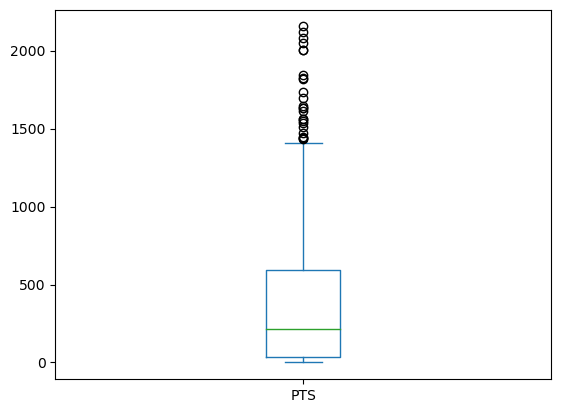

In [12]:
total_points.plot.box()

In [13]:
#利用数据框，可以分析球员的各项投射效率，投射投射
import seaborn as sns
import matplotlib.pyplot as plt
data1 = total[['Player','Pos','Age','Tm','3P','3PA','2P','2PA','FT','FTA','PTS']]
data1 = data1[data1['PTS']>200]
data1

,Player,Pos,Age,Tm,3P,3PA,2P,2PA,FT,FTA,PTS
Rk,,,,,,,,,,,
1,Precious Achiuwa,C,22,TOR,56,156,209,447,78,131,664
2,Steven Adams,C,28,MEM,0,1,210,383,108,199,528
3,Bam Adebayo,C,24,MIA,0,6,406,723,256,340,1068
5,LaMarcus Aldridge,C,36,BRK,14,46,238,412,89,102,607
6,Nickeil Alexander-Walker,SG,23,TOT,105,338,148,342,81,109,692
...,...,...,...,...,...,...,...,...,...,...,...
597,Delon Wright,SG,29,ATL,44,116,78,153,54,63,342
601,Thaddeus Young,PF,33,TOT,17,48,124,224,23,49,322
602,Trae Young,PG,23,ATL,233,610,478,934,500,553,2155


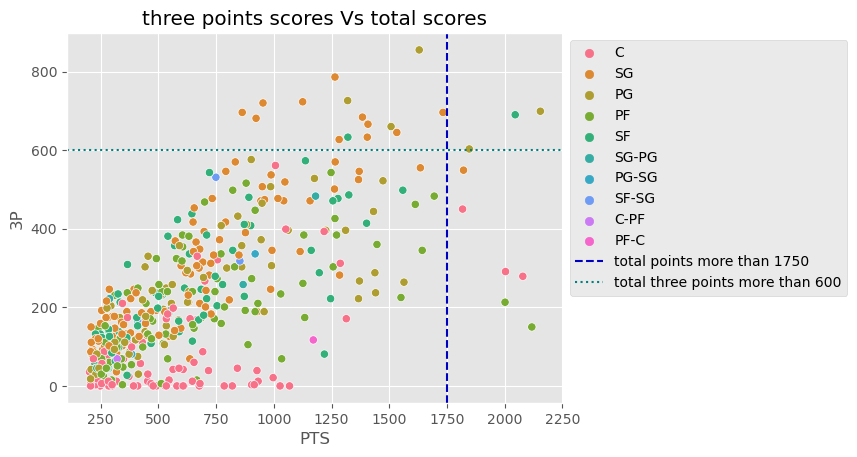

In [99]:
#横轴代表赛季总得分，纵轴代表三分球得分，故每个样本点到原点的斜率代表三分得分占总得分比重
plt.style.use('ggplot')
p = sns.scatterplot(x = 'PTS', y = 3*data1['3P'], data = data1, hue = 'Pos')
p.set_title("three points scores Vs total scores")
plt.axvline(x = 1750 ,ls = 'dashed',label = 'total points more than 1750',color = [0,0,0.75])
plt.axhline(y = 600 ,ls = 'dotted',label = 'total three points more than 600',color = [0,0.5,0.5])
plt.legend(loc = 2, bbox_to_anchor = (1,1))

In [15]:
data1[data1['PTS']>1750][['Player','PTS','3P']]

,Player,PTS,3P
Rk,,,
12,Giannis Antetokounmpo,2002,71
59,Devin Booker,1822,183
134,DeMar DeRozan,2118,50
141,Luka Dončić,1847,201
162,Joel Embiid,2079,93
290,Nikola Jokić,2004,97
526,Jayson Tatum,2046,230
546,Karl-Anthony Towns,1818,150
602,Trae Young,2155,233


In [92]:
data1[data1['3P']>200][['Player','PTS','3P']]

,Player,PTS,3P
Rk,,,
25,LaMelo Ball,1508,220
28,Desmond Bane,1384,228
42,Malik Beasley,953,240
47,Saddiq Bey,1321,211
126,Stephen Curry,1630,285
141,Luka Dončić,1847,201
156,Anthony Edwards,1533,215
174,Evan Fournier,1125,241
237,Buddy Hield,1265,262


<AxesSubplot:xlabel='3PA', ylabel='3P'>

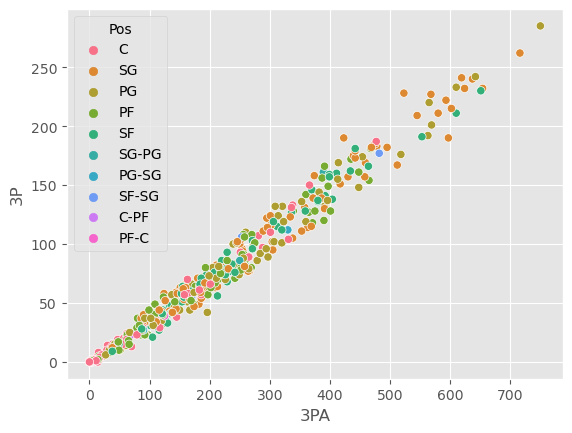

In [16]:
sns.scatterplot(x = '3PA', y = '3P', data = data1, hue = 'Pos')
#x轴代表三分出手数，y轴代表三分命中数，显然每一个点到原点的斜率代表的三分命中率

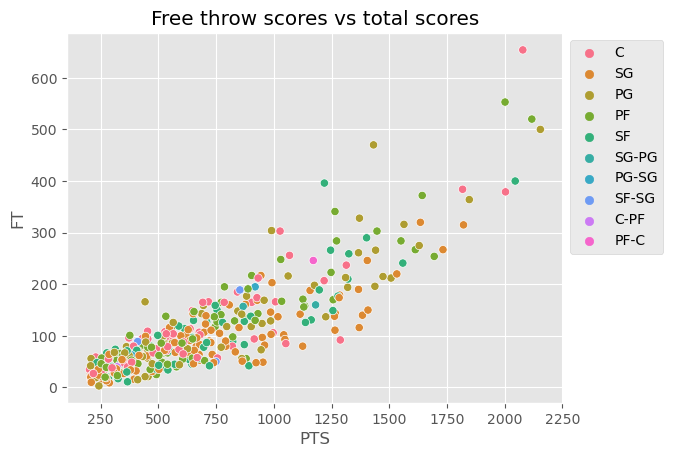

In [100]:
#罚球得分占总得分的比重,显然斜率越大代表越依赖罚球得分
p2 = sns.scatterplot(x = 'PTS', y = 'FT', data = data1, hue = 'Pos')
data1["FT%_allPT"] = data1['FT']/data1['PTS']
p2.set_title("Free throw scores vs total scores")
plt.legend(loc = 2, bbox_to_anchor = (1,1))

In [47]:
data1['3P%_allPT'] = 3*data1['3P']/data1['PTS']
data1['2P%_allPT'] = 2*data1['2P']/data1['PTS']
data1

,Player,Pos,Age,Tm,3P,3PA,2P,2PA,FT,FTA,PTS,FT%_allPT,3P%_allPT,2P%_allPT
Rk,,,,,,,,,,,,,,
1,Precious Achiuwa,C,22,TOR,56,156,209,447,78,131,664,0.117470,0.253012,0.629518
2,Steven Adams,C,28,MEM,0,1,210,383,108,199,528,0.204545,0.000000,0.795455
3,Bam Adebayo,C,24,MIA,0,6,406,723,256,340,1068,0.239700,0.000000,0.760300
5,LaMarcus Aldridge,C,36,BRK,14,46,238,412,89,102,607,0.146623,0.069193,0.784185
6,Nickeil Alexander-Walker,SG,23,TOT,105,338,148,342,81,109,692,0.117052,0.455202,0.427746
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597,Delon Wright,SG,29,ATL,44,116,78,153,54,63,342,0.157895,0.385965,0.456140
601,Thaddeus Young,PF,33,TOT,17,48,124,224,23,49,322,0.071429,0.158385,0.770186
602,Trae Young,PG,23,ATL,233,610,478,934,500,553,2155,0.232019,0.324362,0.443619


<AxesSubplot:xlabel='FTA', ylabel='FT'>

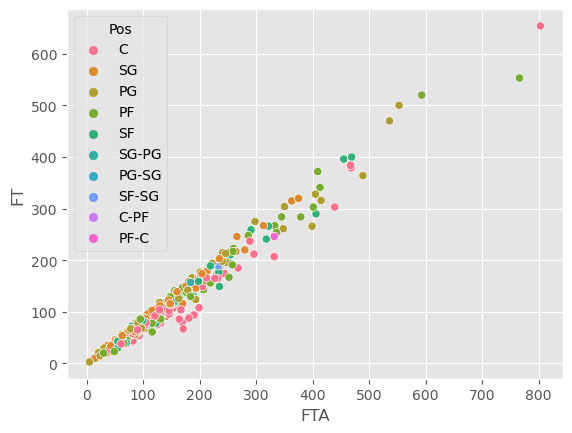

In [38]:
#横轴是罚球总出手数，纵轴是罚球命中数，斜率是罚球命中率
sns.scatterplot(x = 'FTA', y = 'FT', data = data1, hue = 'Pos')

In [104]:
data_FTper = data1[['Player','Pos','Tm','FT','PTS','FT%_allPT']]
data_FTper.sort_values('FT%_allPT',ascending= False,inplace=True)
data_FTper.head(30)

C:\Users\Boyue\AppData\Local\Temp\ipykernel_40232\1688092103.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_FTper.sort_values('FT%_allPT',ascending= False,inplace=True)


,Player,Pos,Tm,FT,PTS,FT%_allPT
Rk,,,,,,
218,James Harden,PG,PHI,166,442,0.375566
218,James Harden,PG,TOT,470,1432,0.328212
87,Jimmy Butler,SF,MIA,396,1219,0.324856
162,Joel Embiid,C,PHI,654,2079,0.314574
218,James Harden,PG,BRK,304,990,0.307071
195,Rudy Gobert,C,UTA,303,1027,0.295034
12,Giannis Antetokounmpo,PF,MIL,553,2002,0.276224
31,Harrison Barnes,PF,SAC,341,1265,0.269565
327,Saben Lee,PG,DET,56,208,0.269231


In [52]:
data_PTper = data1[['Player','Pos','Tm','FT%_allPT','3P%_allPT','2P%_allPT']]
data_PTper.sum(axis = 1)

C:\Users\Boyue\AppData\Local\Temp\ipykernel_40232\2728583597.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data_PTper.sum(axis = 1)


Rk
1      1.0
2      1.0
3      1.0
5      1.0
6      1.0
      ... 
597    1.0
601    1.0
602    1.0
603    1.0
605    1.0
Length: 418, dtype: float64

In [53]:
boston_data_PTper = data_PTper[data_PTper['Tm']=='BOS']
boston_data_PTper

,Player,Pos,Tm,FT%_allPT,3P%_allPT,2P%_allPT
Rk,,,,,,
76,Jaylen Brown,SF,BOS,0.154586,0.319436,0.525978
250,Al Horford,C,BOS,0.114123,0.380884,0.504993
323,Romeo Langford,SG,BOS,0.096618,0.420290,0.483092
462,Payton Pritchard,PG,BOS,0.047511,0.685520,0.266968
474,Josh Richardson,SG,BOS,0.142857,0.435597,0.421546
493,Dennis Schröder,SG,BOS,0.174716,0.285511,0.539773
509,Marcus Smart,PG,BOS,0.164925,0.414634,0.420441
526,Jayson Tatum,SF,BOS,0.195503,0.337243,0.467253
578,Derrick White,SG,BOS,0.223776,0.356643,0.419580


<BarContainer object of 4 artists>

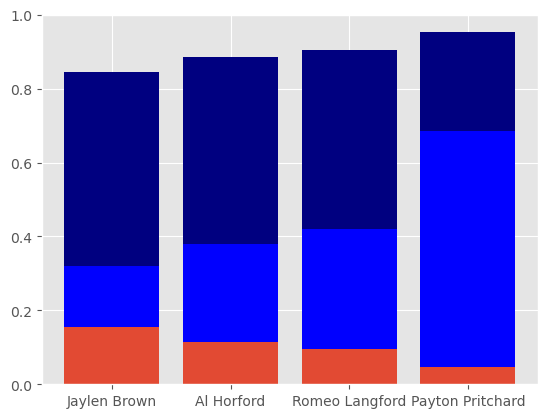

In [54]:
plt.bar(
    x = boston_data_PTper['Player'].head(4), ## 设置x轴内容
    height = boston_data_PTper['FT%_allPT'].head(4),  ## 设置y轴内容
)

plt.bar(
    x = boston_data_PTper['Player'].head(4), ## 设置x轴内容
    height = boston_data_PTper['3P%_allPT'].head(4),  ## 设置y轴内容
    bottom = boston_data_PTper['FT%_allPT'].head(4),  ## 设置上面的图以下面的图的数据为底
    color = [0,0,1]
    )

plt.bar(
    x = boston_data_PTper['Player'].head(4), ## 设置x轴内容
    height = boston_data_PTper['2P%_allPT'].head(4),  ## 设置y轴内容
    bottom = boston_data_PTper['3P%_allPT'].head(4),  ## 设置上面的图以下面的图的数据为底
    color = [0,0,0.5]
    )

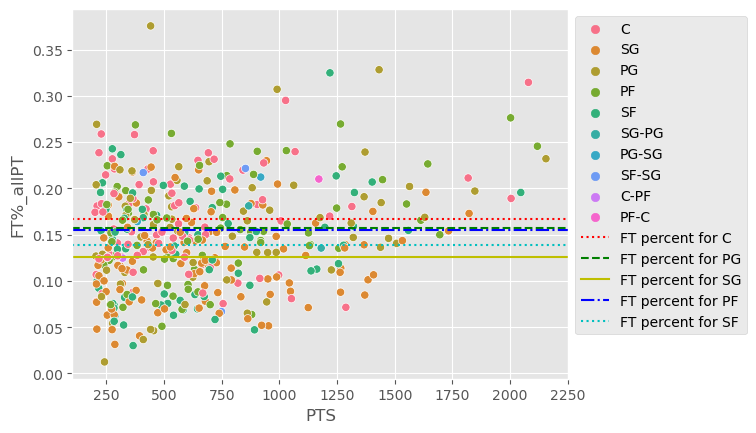

In [112]:
sns.scatterplot(x = 'PTS', y = 'FT%_allPT', data = data1, hue = 'Pos')
plt.legend(loc = 2, bbox_to_anchor = (1,1))
plt.axhline(y = data1[data1['Pos']=='C']['FT%_allPT'].mean() ,ls = 'dotted',label = 'FT percent for C',color = 'r')
plt.axhline(y = data1[data1['Pos']=='PG']['FT%_allPT'].mean() ,ls = 'dashed',label = 'FT percent for PG',color = 'g')
plt.axhline(y = data1[data1['Pos']=='SG']['FT%_allPT'].mean() ,ls = 'solid',label = 'FT percent for SG',color = 'y')
plt.axhline(y = data1[data1['Pos']=='PF']['FT%_allPT'].mean() ,ls = 'dashdot',label = 'FT percent for PF',color = [0,0,1])
plt.axhline(y = data1[data1['Pos']=='SF']['FT%_allPT'].mean() ,ls = ':',label = 'FT percent for SF',color = [0,0.75,0.75])
plt.legend(loc = 2, bbox_to_anchor = (1,1))